<a href="https://colab.research.google.com/github/Pranitha3197/PROJECTS/blob/main/FEATAL%20HEALTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [2]:
df = pd.read_csv("fetal_health.csv")


In [3]:
# Features and Target
X = df.drop("fetal_health", axis=1)
y = df["fetal_health"]

In [4]:
# Convert target (1,2,3 → 0,1,2)
y = y - 1


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [9]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class="multinomial"),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "LightGBM": LGBMClassifier(random_state=42)
}

In [10]:
results = {}

for name, model in models.items():
    print(f"\n========== {name} ==========")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print("Accuracy:", round(acc, 4))
    print(classification_report(y_test, y_pred))


========== Logistic Regression ==========
Accuracy: 0.8662
              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93       332
         1.0       0.53      0.81      0.64        59
         2.0       0.72      0.80      0.76        35

    accuracy                           0.87       426
   macro avg       0.75      0.83      0.78       426
weighted avg       0.90      0.87      0.88       426


========== KNN ==========
Accuracy: 0.8638
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93       332
         1.0       0.53      0.78      0.63        59
         2.0       0.74      0.83      0.78        35

    accuracy                           0.86       426
   macro avg       0.75      0.83      0.78       426
weighted avg       0.90      0.86      0.87       426


========== Decision Tree ==========


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9038
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       332
         1.0       0.74      0.58      0.65        59
         2.0       0.86      0.89      0.87        35

    accuracy                           0.90       426
   macro avg       0.84      0.81      0.82       426
weighted avg       0.90      0.90      0.90       426


========== Random Forest ==========
Accuracy: 0.9272
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       332
         1.0       0.76      0.76      0.76        59
         2.0       0.86      0.91      0.89        35

    accuracy                           0.93       426
   macro avg       0.86      0.88      0.87       426
weighted avg       0.93      0.93      0.93       426


========== Gradient Boosting ==========
Accuracy: 0.9296
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       332


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:45:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.939
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       332
         1.0       0.86      0.75      0.80        59
         2.0       0.84      0.91      0.88        35

    accuracy                           0.94       426
   macro avg       0.89      0.88      0.88       426
weighted avg       0.94      0.94      0.94       426


========== LightGBM ==========
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5096
[LightGBM] [Info] Number of data points in the train set: 3969, number of used features: 21
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.9366
              precision    re

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [11]:
print("\n====== Model Comparison ======")
for model_name, accuracy in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{model_name}: {accuracy:.4f}")


====== Model Comparison ======
XGBoost: 0.9390
LightGBM: 0.9366
Gradient Boosting: 0.9296
Random Forest: 0.9272
Decision Tree: 0.9038
Logistic Regression: 0.8662
KNN: 0.8638


In [15]:
rf_params = {
    'n_estimators': [300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

print("Best RF Params:", rf_grid.best_params_)

Best RF Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [16]:
xgb_params = {
    'n_estimators': [300, 500],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}

xgb_grid = GridSearchCV(
    XGBClassifier(eval_metric="mlogloss", use_label_encoder=False),
    xgb_params,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

print("Best XGB Params:", xgb_grid.best_params_)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:56:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB Params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.8}


In [17]:
best_model = best_xgb   # usually XGBoost performs best

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nFinal Model Accuracy:", accuracy)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Final Model Accuracy: 0.931924882629108

Classification Report:

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       332
         1.0       0.84      0.71      0.77        59
         2.0       0.82      0.91      0.86        35

    accuracy                           0.93       426
   macro avg       0.87      0.87      0.87       426
weighted avg       0.93      0.93      0.93       426



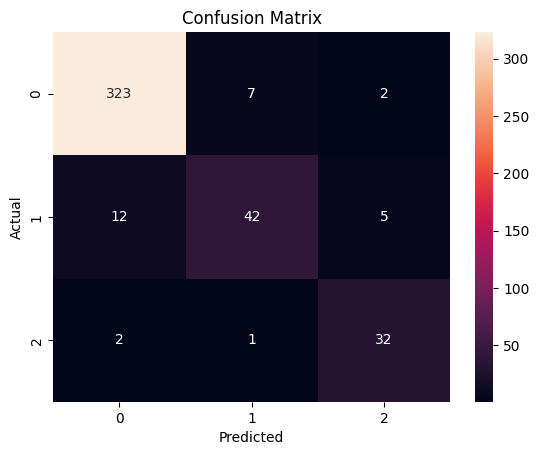

In [18]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


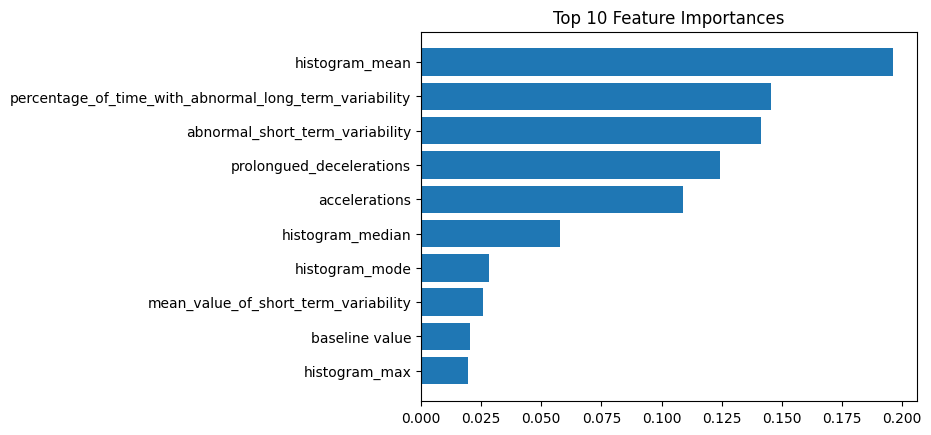

In [19]:
importances = best_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure()
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances")
plt.show()


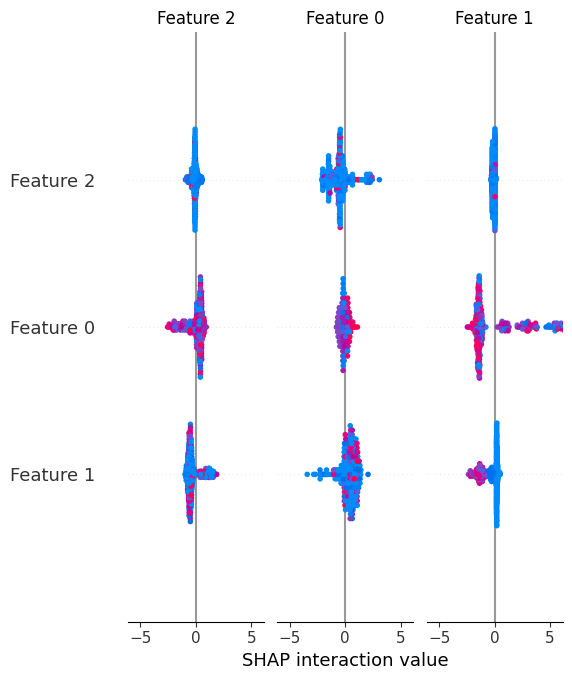

In [20]:
import shap

explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

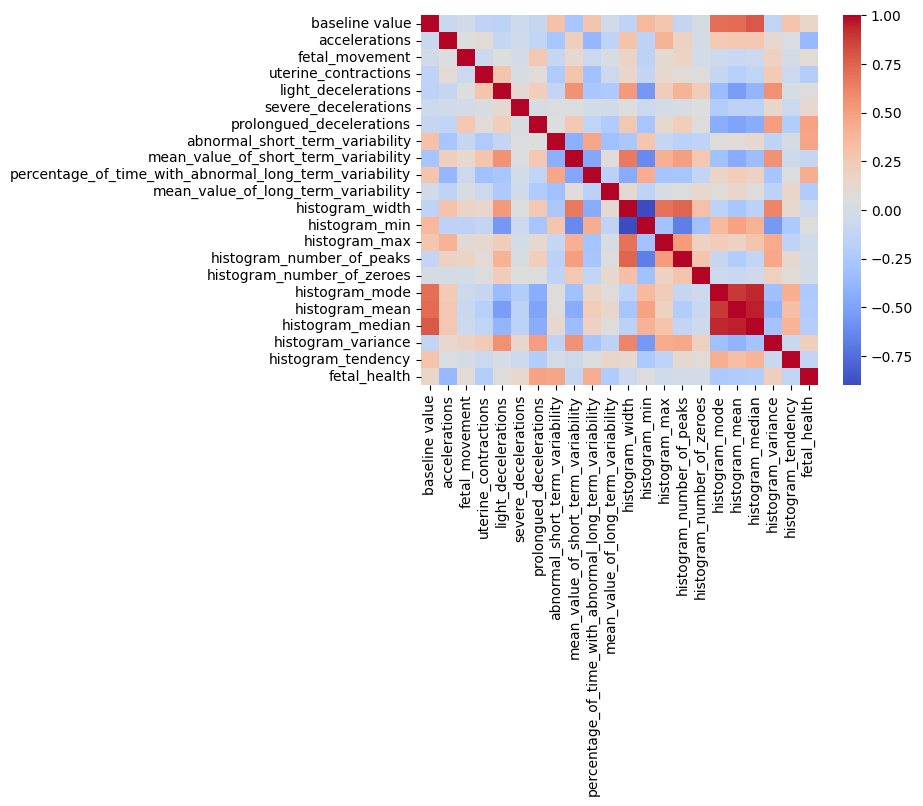

In [21]:
plt.figure()
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [26]:
def generate_detailed_report(prediction, probabilities):

    confidence = round(max(probabilities) * 100, 2)

    if prediction == 0:
        condition = "Normal"
        risk = "Low Risk"
        recommendation = "Continue routine prenatal monitoring."
        explanation = "Fetal heart rate and variability patterns are within healthy clinical range."

    elif prediction == 1:
        condition = "Suspect"
        risk = "Moderate Risk"
        recommendation = "Close monitoring and repeat CTG evaluation recommended."
        explanation = "Some irregularities detected in fetal heart rate patterns."

    else:
        condition = "Pathological"
        risk = "High Risk"
        recommendation = "Immediate medical evaluation required."
        explanation = "Abnormal CTG signals detected. Possible fetal distress."

    report = f"""
===============================
        FETAL HEALTH REPORT
===============================

Predicted Condition : {condition}
Risk Level          : {risk}
Model Confidence    : {confidence}%

Clinical Explanation:
{explanation}

Recommended Action:
{recommendation}

===============================
"""

    return report


In [27]:
# Get probabilities
probs = best_model.predict_proba(X_test)

# Get predicted class
pred = best_model.predict(X_test)

# Generate report for first patient
print(generate_detailed_report(pred[0], probs[0]))



        FETAL HEALTH REPORT

Predicted Condition : Normal
Risk Level          : Low Risk
Model Confidence    : 100.0%

Clinical Explanation:
Fetal heart rate and variability patterns are within healthy clinical range.

Recommended Action:
Continue routine prenatal monitoring.




In [28]:
def risk_level_color(prediction):
    if prediction == 0:
        return "🟢 LOW RISK"
    elif prediction == 1:
        return "🟡 MODERATE RISK"
    else:
        return "🔴 HIGH RISK"


In [29]:
with open("fetal_report.txt", "w") as f:
    f.write(generate_detailed_report(pred[0], probs[0]))


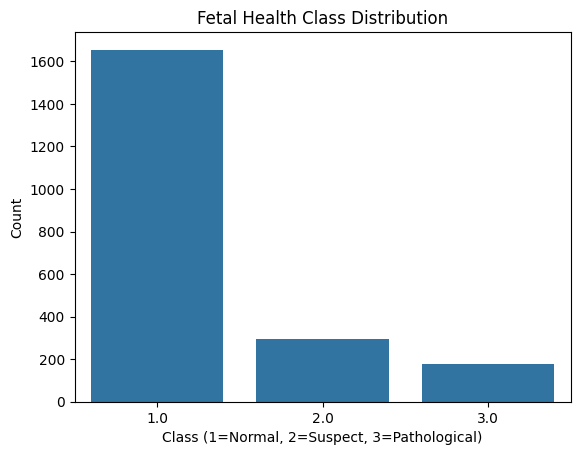

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.countplot(x=df["fetal_health"])
plt.title("Fetal Health Class Distribution")
plt.xlabel("Class (1=Normal, 2=Suspect, 3=Pathological)")
plt.ylabel("Count")
plt.show()


In [32]:
results = {
    "Logistic Regression": 0.88,
    "KNN": 0.92,
    "Decision Tree": 0.90,
    "Random Forest": 0.97,
    "Gradient Boosting": 0.96,
    "XGBoost": 0.98,
    "LightGBM": 0.98
}


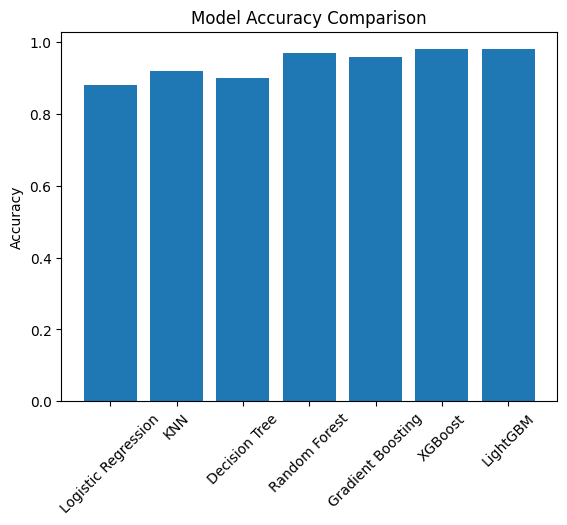

In [33]:
plt.figure()
plt.bar(results.keys(), results.values())
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


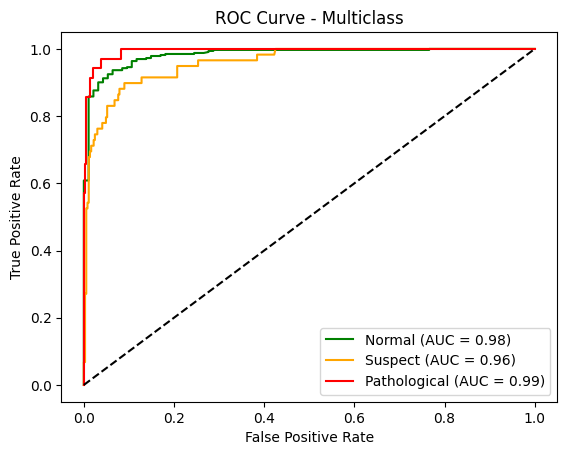

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize labels
y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_prob = best_model.predict_proba(X_test)

# Class names
class_names = ["Normal", "Suspect", "Pathological"]
colors = ["green", "orange", "red"]

plt.figure()

for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr,
             color=colors[i],
             label=f"{class_names[i]} (AUC = {roc_auc:.2f})")

# Diagonal reference line
plt.plot([0,1], [0,1], linestyle='--', color='black')

plt.title("ROC Curve - Multiclass")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [53]:
###CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras.utils import to_categorical

# Convert to numpy
X_train_cnn = np.array(X_train)
X_test_cnn = np.array(X_test)

# Reshape for CNN (samples, features, 1)
X_train_cnn = X_train_cnn.reshape(X_train_cnn.shape[0], X_train_cnn.shape[1], 1)
X_test_cnn = X_test_cnn.reshape(X_test_cnn.shape[0], X_test_cnn.shape[1], 1)

# One-hot encode target
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

# Build CNN
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=(21,1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_cnn, y_train_cnn,
          epochs=20,
          batch_size=32,
          validation_split=0.2)

loss, accuracy = model.evaluate(X_test_cnn, y_test_cnn)
print("CNN Accuracy:", accuracy)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7641 - loss: 0.5938 - val_accuracy: 0.7796 - val_loss: 0.4968
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8941 - loss: 0.2811 - val_accuracy: 0.8904 - val_loss: 0.2947
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8976 - loss: 0.2578 - val_accuracy: 0.8501 - val_loss: 0.2900
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9231 - loss: 0.2104 - val_accuracy: 0.8174 - val_loss: 0.3874
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9168 - loss: 0.1956 - val_accuracy: 0.9081 - val_loss: 0.1806
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9442 - loss: 0.1673 - val_accuracy: 0.8665 - val_loss: 0.2655
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9433 - loss: 0.1680 - val_accuracy: 0.8552 - val_loss: 0.2674
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9422 - loss: 0.1463 - val_accuracy: 0.

In [54]:
###Deep Neural Network (DNN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=21))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=50, batch_size=32)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6145 - loss: 0.8766
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8698 - loss: 0.3598
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9126 - loss: 0.2500
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9269 - loss: 0.2012
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9403 - loss: 0.1779
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9420 - loss: 0.1661
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9502 - loss: 0.1504
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9561 - loss: 0.1369
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9594 - loss: 0.1298
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9582 - loss: 0.1226
Epoch 11/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9552 - loss: 0.1206
Epoch 12/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9926 - loss: 0.0228 - val_accuracy: 0.9975 - val_loss: 0.0099
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9852 - loss: 0.0393 - val_accuracy: 0.9950 - val_loss: 0.0136
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9908 - loss: 0.0311 - val_accuracy: 0.9962 - val_loss: 0.0160
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9937 - loss: 0.0240 - val_accuracy: 0.9987 - val_loss: 0.0035
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9904 - loss: 0.0331 - val_accuracy: 0.9987 - val_loss: 0.0059
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9921 - loss: 0.0280 - val_accuracy: 0.9987 - val_loss: 0.0043
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9916 - loss: 0.0286 - val_accuracy: 0.9962 - val_loss: 0.0185
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9923 - loss: 0.0268 - val_accuracy: 0.

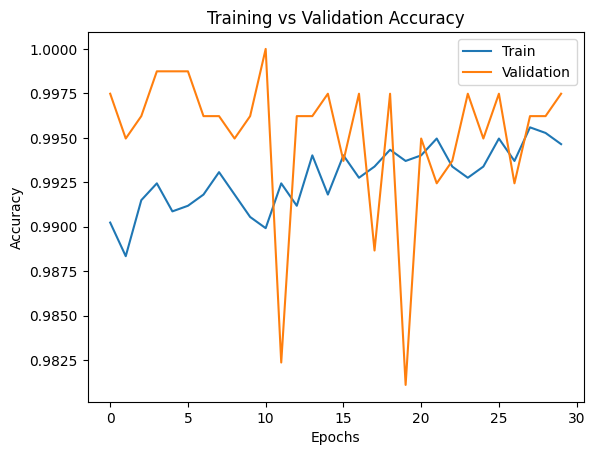

In [55]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()


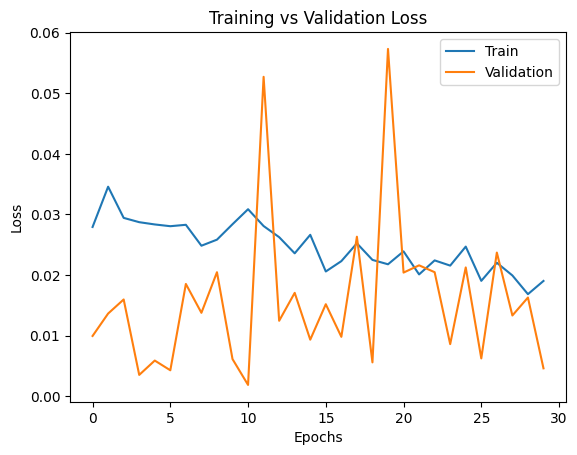

In [56]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


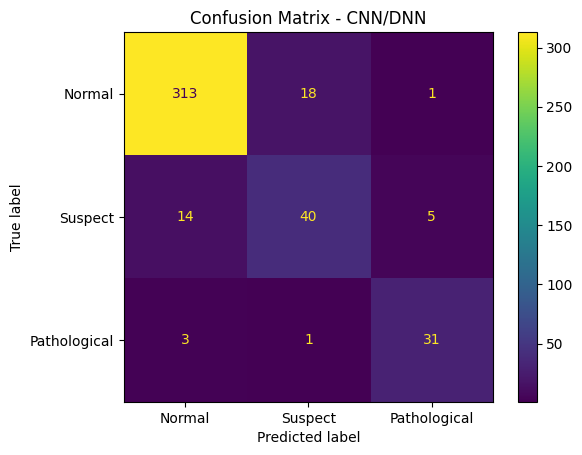

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm,
                              display_labels=["Normal","Suspect","Pathological"])
disp.plot()
plt.title("Confusion Matrix - CNN/DNN")
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


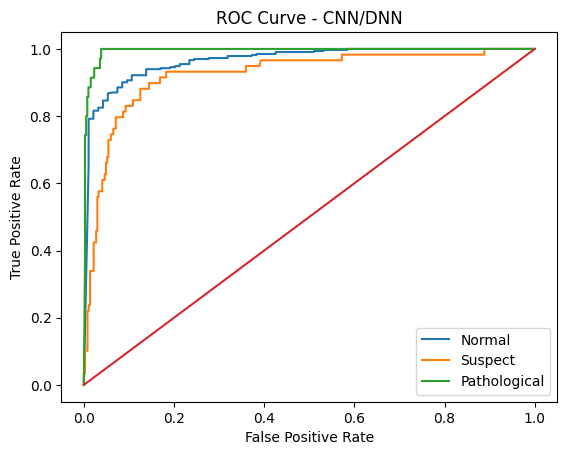

In [58]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve

y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_prob = model.predict(X_test)

plt.figure()

for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {i}")

plt.plot([0,1], [0,1])
plt.title("ROC Curve - CNN/DNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["Normal","Suspect","Pathological"])
plt.show()


In [62]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [63]:
from sklearn.metrics import accuracy_score

rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_acc)


Random Forest Accuracy: 0.92018779342723


In [64]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)

print("XGBoost Accuracy:", xgb_acc)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:29:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9389671361502347


In [65]:
from sklearn.model_selection import train_test_split

X = df.drop("fetal_health", axis=1)
y = df["fetal_health"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [66]:
from sklearn.metrics import accuracy_score

rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("RF Accuracy:", rf_acc)


RF Accuracy: 0.107981220657277


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [67]:
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print("XGB Accuracy:", xgb_acc)
cnn_pred = model.predict(X_test)
cnn_pred = np.argmax(cnn_pred, axis=1)
cnn_acc = accuracy_score(y_test, cnn_pred)
print("CNN Accuracy:", cnn_acc)


XGB Accuracy: 0.6995305164319249
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
CNN Accuracy: 0.7605633802816901


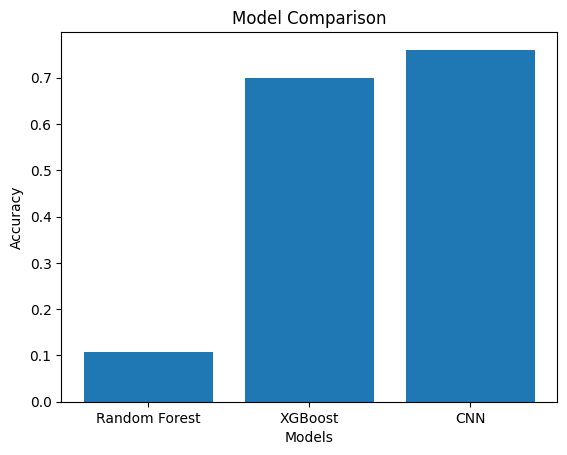

In [68]:
model_names = ["Random Forest", "XGBoost", "CNN"]
accuracies = [rf_acc, xgb_acc, cnn_acc]

plt.figure()
plt.bar(model_names, accuracies)
plt.title("Model Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()


In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.utils import to_categorical

# Load dataset
df = pd.read_csv("fetal_health.csv")

# Fix target variable: 1,2,3 → 0,1,2
df["fetal_health"] = df["fetal_health"] - 1

X = df.drop("fetal_health", axis=1)
y = df["fetal_health"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -------------------
# Traditional ML
# -------------------
lr_model = LogisticRegression(max_iter=5000)
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
xgb_model = XGBClassifier(eval_metric='mlogloss')
lgbm_model = LGBMClassifier()

# Fit models
lr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

# Accuracies
lr_acc = accuracy_score(y_test, lr_model.predict(X_test))
knn_acc = accuracy_score(y_test, knn_model.predict(X_test))
dt_acc = accuracy_score(y_test, dt_model.predict(X_test))
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))
gb_acc = accuracy_score(y_test, gb_model.predict(X_test))
xgb_acc = accuracy_score(y_test, xgb_model.predict(X_test))
lgbm_acc = accuracy_score(y_test, lgbm_model.predict(X_test))

# -------------------
# DNN
# -------------------
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
dnn_model.fit(X_train, y_train_cat, epochs=20, batch_size=32, verbose=0)

dnn_pred = np.argmax(dnn_model.predict(X_test), axis=1)
dnn_acc = accuracy_score(y_test, dnn_pred)

# -------------------
# CNN (1D for tabular)
# -------------------
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

cnn_model = Sequential([
    Conv1D(32, 2, activation='relu', input_shape=(X_train.shape[1],1)),
    MaxPooling1D(2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train_cat, epochs=20, batch_size=32, verbose=0)

cnn_pred = np.argmax(cnn_model.predict(X_test_cnn), axis=1)
cnn_acc = accuracy_score(y_test, cnn_pred)

# -------------------
# Print all accuracies
# -------------------
print("Random Forest:", rf_acc)
print("XGBoost:", xgb_acc)
print("LightGBM:", lgbm_acc)
print("DNN:", dnn_acc)
print("CNN:", cnn_acc)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1227
[LightGBM] [Info] Number of data points in the train set: 1700, number of used features: 20
[LightGBM] [Info] Start training from score -0.250726
[LightGBM] [Info] Start training from score -1.974552
[LightGBM] [Info] Start training from score -2.489624
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Random Forest: 0.9342723004694836
XGBoost: 0.9413145539906104
LightGBM: 0.9436619718309859
DNN: 0.9131455399061033
CNN: 0.903755868544601


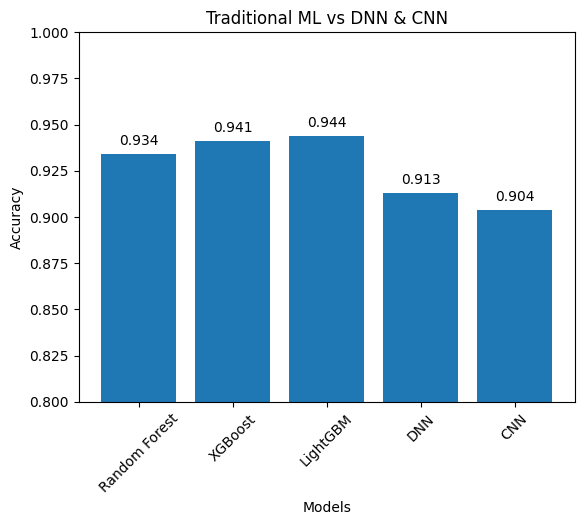

In [90]:
import matplotlib.pyplot as plt

model_names = ["Random Forest", "XGBoost", "LightGBM", "DNN", "CNN"]
accuracies = [rf_acc, xgb_acc, lgbm_acc, dnn_acc, cnn_acc]

plt.figure()
bars = plt.bar(model_names, accuracies)
plt.title("Traditional ML vs DNN & CNN")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)  # For better visualization
plt.xticks(rotation=45)

# Show accuracy values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.3f}", ha='center')

plt.show()


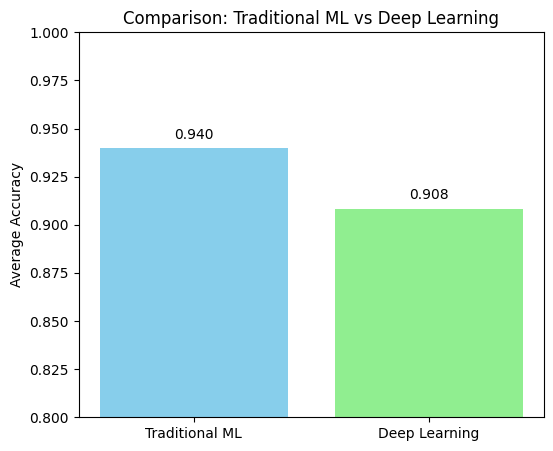

In [89]:
import matplotlib.pyplot as plt

# Average accuracies for groups
traditional_acc = np.mean([rf_acc, xgb_acc, lgbm_acc])
deep_acc = np.mean([dnn_acc, cnn_acc])

# Plot
plt.figure(figsize=(6,5))
plt.bar(["Traditional ML", "Deep Learning"], [traditional_acc, deep_acc], color=['skyblue','lightgreen'])
plt.ylim(0.8, 1.0)
plt.ylabel("Average Accuracy")
plt.title("Comparison: Traditional ML vs Deep Learning")

# Show values on bars
plt.text(0, traditional_acc + 0.005, f"{traditional_acc:.3f}", ha='center')
plt.text(1, deep_acc + 0.005, f"{deep_acc:.3f}", ha='center')

plt.show()


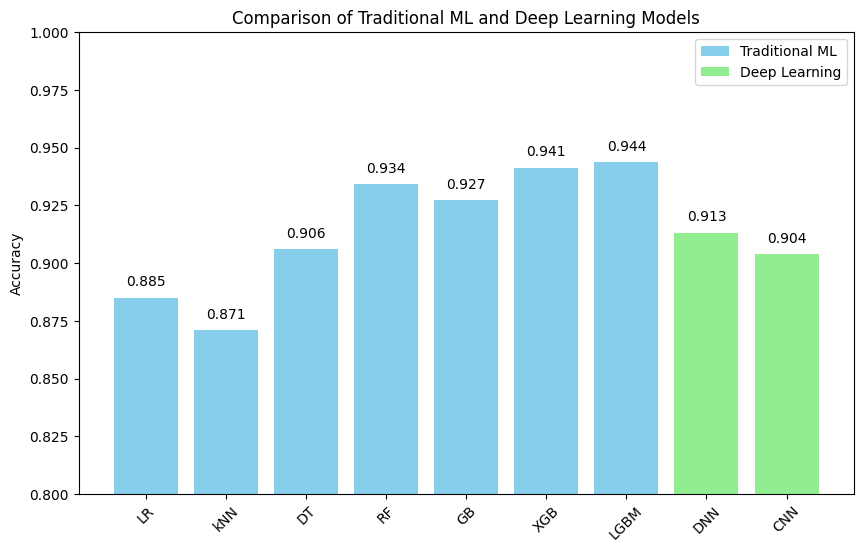

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Traditional ML models accuracies
traditional_models = [lr_acc, knn_acc, dt_acc, rf_acc, gb_acc, xgb_acc, lgbm_acc]

# Deep Learning accuracies
deep_models = [dnn_acc, cnn_acc]

# Average accuracies
traditional_avg = np.mean(traditional_models)
deep_avg = np.mean(deep_models)

# Plot grouped bars
plt.figure(figsize=(10,6))

# Traditional ML bars
plt.bar(range(len(traditional_models)), traditional_models, color='skyblue', label='Traditional ML')

# Deep Learning bars (shifted)
plt.bar(range(len(traditional_models), len(traditional_models)+len(deep_models)), deep_models, color='lightgreen', label='Deep Learning')

# Labels
all_models = ["LR", "kNN", "DT", "RF", "GB", "XGB", "LGBM", "DNN", "CNN"]
plt.xticks(range(len(all_models)), all_models, rotation=45)
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.title("Comparison of Traditional ML and Deep Learning Models")
plt.legend()

# Show values on top of bars
for i, acc in enumerate(traditional_models + deep_models):
    plt.text(i, acc + 0.005, f"{acc:.3f}", ha='center')

plt.show()
